In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

# API Key
from config import apikey

In [2]:
stocks_df=pd.read_csv("500_stock_export.csv")
#stocks_df=pd.DataFrame(stocks_df)
stocks_df.head()

,Symbol,Name,Sector,10/4/19,10/11/19,10/18/19,10/25/19,11/1/19,11/8/19,11/15/19,...,1/17/20,1/24/20,1/31/20,2/7/20,2/14/20,2/21/20,2/28/20,3/6/20,3/13/20,Difference
0,REGN,Regeneron,Health Care,282.93,300.77,300.19,306.21,310.48,341.79,344.87,...,385.94,345.28,337.94,381.87,399.55,403.15,444.57,494.43,465.550,-182.620
1,BIIB,Biogen Inc.,Health Care,224.00,223.21,220.06,288.04,299.20,293.25,282.27,...,285.50,278.14,268.85,338.70,333.00,336.71,308.39,317.95,305.210,-81.210
2,NFLX,Netflix Inc.,Information Technology,272.79,282.93,275.30,276.82,286.81,291.57,295.03,...,339.67,353.16,345.09,366.77,380.40,380.07,369.03,368.97,336.295,-63.505
3,NVDA,Nvidia Corporation,Information Technology,181.97,185.99,190.49,204.54,202.59,207.78,204.19,...,249.28,250.48,236.43,251.59,289.79,294.07,270.07,266.04,240.840,-58.870
4,ADBE,Adobe Systems Inc,Information Technology,276.96,278.29,265.52,270.98,277.82,292.46,297.50,...,349.74,351.37,351.14,366.09,379.67,372.95,345.12,336.77,335.500,-58.540


In [3]:
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [16]:
stocks_df

,Symbol,Name,Sector,10/4/19,10/11/19,10/18/19,10/25/19,11/1/19,11/8/19,11/15/19,...,1/17/20,1/24/20,1/31/20,2/7/20,2/14/20,2/21/20,2/28/20,3/6/20,3/13/20,Difference
0,REGN,Regeneron,Health Care,282.93,300.77,300.19,306.21,310.48,341.79,344.87,...,385.94,345.28,337.94,381.87,399.55,403.15,444.57,494.43,465.550,-182.620
1,BIIB,Biogen Inc.,Health Care,224.00,223.21,220.06,288.04,299.20,293.25,282.27,...,285.50,278.14,268.85,338.70,333.00,336.71,308.39,317.95,305.210,-81.210
2,NFLX,Netflix Inc.,Information Technology,272.79,282.93,275.30,276.82,286.81,291.57,295.03,...,339.67,353.16,345.09,366.77,380.40,380.07,369.03,368.97,336.295,-63.505
3,NVDA,Nvidia Corporation,Information Technology,181.97,185.99,190.49,204.54,202.59,207.78,204.19,...,249.28,250.48,236.43,251.59,289.79,294.07,270.07,266.04,240.840,-58.870
4,ADBE,Adobe Systems Inc,Information Technology,276.96,278.29,265.52,270.98,277.82,292.46,297.50,...,349.74,351.37,351.14,366.09,379.67,372.95,345.12,336.77,335.500,-58.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,ADS,Alliance Data Systems,Information Technology,123.88,122.55,123.54,104.80,101.06,107.90,103.45,...,112.91,107.40,102.79,105.92,102.83,102.16,85.88,72.61,49.510,74.370
462,TDG,TransDigm Group,Industrials,513.61,524.78,526.57,523.45,538.28,541.08,559.78,...,636.66,656.73,643.28,634.54,646.75,629.90,557.81,503.11,414.720,98.890
463,CMG,Chipotle Mexican Grill,Consumer Discretionary,823.93,830.35,841.48,787.87,768.63,731.62,754.66,...,878.15,869.71,866.76,864.22,921.94,920.14,773.58,723.08,630.360,193.570
464,BA,Boeing Company,Industrials,375.70,374.92,344.00,339.83,345.19,351.00,371.68,...,324.15,323.05,318.27,336.75,340.49,330.38,275.11,262.33,170.200,205.500


In [18]:
cd_df = stocks_df.loc[stocks_df['Sector'] == 'Consumer Discretionary']

In [19]:
cddate_df=cd_df.set_index(['Symbol'])
cddate_df=cddate_df.drop(['Sector', 'Name'], axis=1)
cddate_df

,10/4/19,10/11/19,10/18/19,10/25/19,11/1/19,11/8/19,11/15/19,11/22/19,11/29/19,12/6/19,...,1/17/20,1/24/20,1/31/20,2/7/20,2/14/20,2/21/20,2/28/20,3/6/20,3/13/20,Difference
Symbol,,,,,,,,,,,,,,,,,,,,,
AMZN,1739.650,1731.92,1757.510,1761.33,1791.44,1785.88,1739.49,1745.72,1800.80,1751.60,...,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00,-45.350
TIF,88.060,91.88,88.490,98.55,127.00,125.67,125.08,125.51,133.80,133.55,...,134.25,134.29,134.02,134.11,134.27,134.24,133.59,132.70,127.94,-39.880
CHTR,427.720,423.16,440.050,462.19,476.48,469.75,475.60,468.50,470.01,467.85,...,502.73,504.67,517.46,525.21,534.89,535.34,493.17,496.72,454.19,-26.470
LB,18.460,17.50,16.310,17.76,17.54,17.75,18.07,18.01,19.14,17.82,...,20.16,20.74,23.16,23.58,24.34,24.07,21.66,22.25,16.12,2.340
MAT,11.025,11.67,11.225,10.17,11.89,12.16,11.76,11.67,11.70,12.07,...,14.28,14.28,14.63,14.08,13.95,12.94,11.79,11.67,8.25,2.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HAS,118.240,121.29,121.960,96.01,96.44,95.53,95.41,96.12,101.70,101.00,...,105.13,104.68,101.87,99.74,97.71,89.97,77.25,72.75,55.02,63.220
EXPE,133.220,138.27,136.030,137.06,137.80,101.32,95.67,96.63,101.66,107.58,...,111.82,112.14,108.45,110.09,122.80,120.12,98.62,91.85,69.63,63.590
RCL,103.310,107.57,111.180,111.37,111.18,114.53,117.89,119.13,120.02,122.07,...,135.05,126.51,117.08,111.55,113.16,106.11,80.41,65.01,32.33,70.980


In [6]:
cddate_df=cddate_df.swapaxes("index", "columns") 
cddate_df=cddate_df.reset_index()
cddate_df=cddate_df.rename(columns={"index": "date_range"})


In [7]:
cddate = cddate_df.index.astype('O')
cddate_df.set_index("date_range", inplace = True)

In [8]:
cddate_df

Symbol,AMZN,TIF,CHTR,LB,MAT,F,NWSA,NWS,TJX,IPG,...,DLTR,ULTA,AAP,AZO,DRI,HAS,EXPE,RCL,CMG,BKNG
date_range,,,,,,,,,,,,,,,,,,,,,
10/4/19,1739.65,88.06,427.72,18.46,11.025,8.74,13.860,14.115,55.29,20.85,...,115.725,250.60,159.94,1060.33,116.42,118.24,133.22,103.31,823.93,1983.20
10/11/19,1731.92,91.88,423.16,17.50,11.670,8.78,13.500,13.760,58.57,20.08,...,115.190,248.46,158.56,1085.97,113.04,121.29,138.27,107.57,830.35,1977.18
10/18/19,1757.51,88.49,440.05,16.31,11.225,9.29,13.470,13.790,60.36,20.65,...,116.980,239.92,163.50,1110.00,110.45,121.96,136.03,111.18,841.48,2013.53
10/25/19,1761.33,98.55,462.19,17.76,10.170,8.72,13.800,14.210,59.10,21.85,...,114.550,240.90,165.56,1129.47,112.37,96.01,137.06,111.37,787.87,2055.93
11/1/19,1791.44,127.00,476.48,17.54,11.890,8.89,13.760,14.180,58.01,21.95,...,111.740,233.11,164.82,1156.28,112.17,96.44,137.80,111.18,768.63,2032.02
11/8/19,1785.88,125.67,469.75,17.75,12.160,9.04,12.900,13.230,59.23,22.97,...,110.350,239.29,167.40,1165.86,114.91,95.53,101.32,114.53,731.62,1879.19
11/15/19,1739.49,125.08,475.60,18.07,11.760,8.95,12.990,13.320,59.82,22.33,...,108.850,246.30,162.66,1171.88,112.60,95.41,95.67,117.89,754.66,1848.82
11/22/19,1745.72,125.51,468.50,18.01,11.670,8.89,12.710,12.980,59.18,22.09,...,109.040,228.86,157.87,1163.87,114.67,96.12,96.63,119.13,772.61,1877.53
11/29/19,1800.80,133.80,470.01,19.14,11.700,9.06,12.880,13.170,61.13,22.40,...,91.460,233.86,157.08,1177.92,118.44,101.70,101.66,120.02,813.92,1904.03


In [9]:
new_dict = {"date_range":[], "value":[]}
rowNum = 0
for index, row in cddate_df[:-2].iterrows():
    for x in range(len(cddate_df.columns)-1):
        new_dict["date_range"].append(index)
        value = cddate_df.iloc[rowNum+1,x+1] - cddate_df.iloc[rowNum,x+1]
        new_dict["value"].append(value)
    rowNum = rowNum + 1

In [10]:
scatter_df = pd.DataFrame(new_dict)
scatter_df.head()

,date_range,value
0,10/4/19,3.820
1,10/4/19,-4.560
2,10/4/19,-0.960
3,10/4/19,0.645
4,10/4/19,0.040


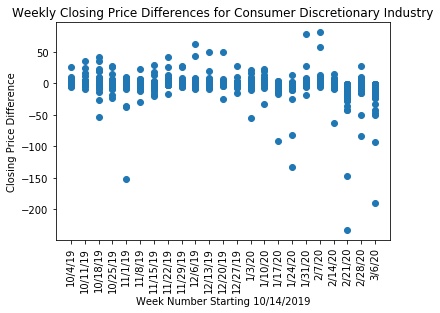

In [11]:
x = scatter_df['date_range']
y = scatter_df['value']

plt.scatter(scatter_df['date_range'],scatter_df['value'])
plt.title("Weekly Closing Price Differences for Consumer Discretionary Industry")
plt.ylabel("Closing Price Difference")
plt.xlabel("Week Number Starting 10/14/2019")
plt.xticks(rotation=90)
plt.savefig('Scatter_ConsDiscr.png')

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq,(10,-1000),fontsize=15,color="red")
#print(f"The r-squared is: {rvalue}")
plt.show()

In [13]:
cleaned_stocks=stocks_df.copy()
#cleaned_stocks=stocks_df.dropna()
#cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
cleaned_stocks.head()

sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head(11)

,10/4/19,10/11/19,10/18/19,10/25/19,11/1/19,11/8/19,11/15/19,11/22/19,11/29/19,12/6/19,...,1/17/20,1/24/20,1/31/20,2/7/20,2/14/20,2/21/20,2/28/20,3/6/20,3/13/20,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,93.057833,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,48.567407,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,100.096667,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615937,132.783203,...,139.756094,138.620469,134.233750,137.693437,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,159.450448,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,119.506818,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,122.095312,121.188750,122.807813,121.790312,120.881562,116.390625,118.725000,117.303750,118.856250,118.557188,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804687,111.363750,10.731562


In [14]:
sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
          'Industrials', 'Information Technology', 'Materials', 'Real Estate',
          'Telecommunication Services', 'Utilities']

partDf = stocks_df.loc[stocks_df['Sector'] == 'Consumer Discretionary']

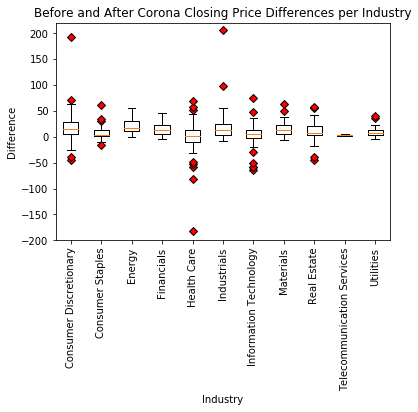

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Before and After Corona Closing Price Differences per Industry')
ax1.set_ylabel('Difference')
ax1.set_xlabel('Industry')
plt.xticks(rotation=90)
plt.ylim(-200,220)
red_diamond = dict(markerfacecolor='r', marker='D')
diffList = []
for sec in sectors:
    partialDf = stocks_df.loc[stocks_df['Sector'] == sec]
    diffs = partialDf["Difference"]
    diffList.append(diffs)
ax1.boxplot(diffList, labels=sectors, flierprops=red_diamond)
plt.savefig('Sector_BoxPlot.png')
plt.show()